# Eximo - Reinforcement Learning


When developing agents to play adversarial games, it is often difficult to implement them using traditional techniques due to the breath of possible actions and states, and limited knowledge of the game leading to the use of subpar heuristics.

Machine learning techniques, on the other hand, may help solve this issue. In particular, Reinforcement Learning is particularly suited to the situation, since an adversarial game may easily be translated to a reward-based environment. This notebook aims to explore the effectiveness of this technique for implementing an agent to play the board game Eximo, making use of standard reinforcement learning tools.

**Keywords:** Reinforcement Learning, Eximo, OpenAI Gym, Artificial Intelligence

### Authors and Affiliation
 * Bernardo Santos  up201706534
 * João Matos       up201705471
 * Vítor Gonçalves  up201703917
 
 ¹ FEUP-IART, 3MIEIC01, Eximo_2A
 
 ² Faculdade de Engenharia da Universidade do Porto, Rua Doutor Roberto Frias, s/n 4200-465, Porto PORTUGAL incoming@fe.up.pt http://www.fe.up.pt
 

## Introduction
___

The project aims to apply the knowledge acquired and addressed during the theoretical and practical classes of the Artificial Intelligence curricular unit of the 2nd semester of the 3rd year of the Integrated Master in Informatics and Computing Engineering, focusing on the use of **reward-based algorithms** that allows an agent to learn to play the Eximo board game.

In the first half of the semester the group implemented an **adversarial research** algorithm for the same game, and given that we would like to explore the potential that we could obtain with **reinforcement learning**, while still taking advantage of much of the code for the game's logic, everyone involved agreed to move forward with this project.

The aim of this notebook is to **expose** and **clarify** any doubts that may have arisen, describing the approach used by the group, focusing essentially on demonstrating the problem, action space, observation space, experimental results, as well as the main conclusions we reached.

The notebook is divided accordingly: 

**1. [Description of the problem](#Description-of-the-problem):**

**2. [Approach](#Approach):**

**3. [Experimental evaluation](#Experimental-Evaluation):**

**4. [Conclusion](#Conclusions):**

**5. [References](#References):**

## Description of the problem
___

### Eximo
Eximo is a member of the Checkers family designed on 1 February 2013.

<img src="assets/board.png" width="300px" alt="Eximo Board" />

#### Goal
In order to win a game of Eximo the player must achieve one of two goals:
 * capture all of the opponent's pieces
 * stalemate the opponent, so that he has no moves left
 
#### Player Actions
To achieve the above goals, the player has a set of 4 different types of actions.

##### Move
A piece is able to move forward and diagonaly forward into an adjacent empty square. Possible moves are represented in the image below with green dots.
<img src="assets/move.png" width="200px" alt="Ordinary Move" />

##### Jump
Jump over an adjacent friendly piece (in the same three directions as an ordinary move) if the next square in the same direction is empty, placing the piece on the empty square. If the same player’s piece can continue moving by jumping another friendly piece, then it must do so (Figure 4). During the jumping move that piece cannot capture enemy pieces. Possible jumps are represented in the image below with green dots.
<img src="assets/jump.png" width="200px" alt="Jump Move" />

##### Capture
A piece is able to jump over a (forward, diagonally forward, right or left) adjacent enemy’s piece if the next square in the same direction is empty, placing the piece on that same square and removing the opponent’s piece from the board. If the piece can continue capturing, then it must do so (capturing is mandatory, and the player must keep capturing as long as possible). Possible jumps are represented in the image below with green dots.
<img src="assets/capture.png" width="200px" alt="Capture Move" />

##### Place
When a piece reaches the opponent's end of the board, that same piece is removed and the player may place two pieces on their dropzone (represented in the image below). If there are no empty cells the player does not have the opportunity to place any pieces and the game continues. If there is only one empty cell then the player can place the piece in that cell.
<img src="assets/place.png" width="300px" alt="Dropzones" />



## Approach
___

Since we had already implemented the game logic in the last assignment, we had to adapt our implementation to work flawlessly with the OpenAi Gym toolkit by developing an environment.

### Action Space
The first problem we faced was defining our action space, but after some thought we realized it could be represented by a discrete space, since our number of actions is limited even though it can be very high.

Each piece can be moved using the actions described above, the move and jump actions are split into 3 different actions each (one for each direction) and the capture action is slipt into 5 different actions, making a total of **11 possible actions per piece**. But these are not all the possible acions, a player can also place new pieces on the board in **12 dropzone positions per player** on the board.

Fistly we needed to get the number of possible of actions and as such we arrived at our first value **1432 actions** (<code>1432 = 2 players * (64 positions * 11 actions + 12 placement positions)</code>). This value was too high and we could still reduce it by introducing some extra logic, and so we did. By calculating the symmetric position whenever player number 1 was playing, we reduced our action space in half, **761 actions** (<code>761 = 64 positions * 11 actions + 12 placement positions</code>). This number of actions is considerably lower than the first, however, due to the fact that in  Eximo whenever a piece reaches the opposite side of the board it gets instantly removed, we can remove the last row from our calculations, lowering the size of our action space to **628 actions** (<code>628 = 56 positions * 11 actions + 12 placement positions</code>). And because ther is always room for improvement, we noticed that there are to cells that are never used by the player, those being the leftmost and rightmost cells of the player's home row. By removing these two cells we achieved our final action space composed of **606 actions** (<code>606 = 54 positions * 11 actions + 12 placement positions</code>).

<table align="right" style="margin: 0 2em 2em 2em; border: 3px solid #f8f8f8;">
    <tr><th>In-Game Action</th><th>Direction</th><th>Action Index</th></th>
    <tr>
        <td style="text-align: center" rowspan="3">Move</td>
        <td style="text-align: center">NW</td>
        <td style="text-align: center">0</td>
    </tr>
    <tr>
        <td style="text-align: center">N</td>
        <td style="text-align: center">1</td>
    </tr>
    <tr>
        <td style="text-align: center">NE</td>
        <td style="text-align: center">2</td>
    </tr>
    <tr>
        <td style="text-align: center" rowspan="3">Jump</td>
        <td style="text-align: center">NW</td>
        <td style="text-align: center">3</td>
    </tr>
    <tr>
        <td style="text-align: center">N</td>
        <td style="text-align: center">4</td>
    </tr>
    <tr>
        <td style="text-align: center">NE</td>
        <td style="text-align: center">5</td>
    </tr>
    <tr>
        <td style="text-align: center" rowspan="5">Capture</td>
        <td style="text-align: center">W</td>
        <td style="text-align: center">6</td>
    </tr>
    <tr>
        <td style="text-align: center">NW</td>
        <td style="text-align: center">7</td>
    </tr>
    <tr>
        <td style="text-align: center">N</td>
        <td style="text-align: center">8</td>
    </tr>
    <tr>
        <td style="text-align: center">NE</td>
        <td style="text-align: center">9</td>
    </tr>
    <tr>
        <td style="text-align: center">E</td>
        <td style="text-align: center">10</td>
    </tr>
</table>

In order to assign a number to an in-game action we figured that the best solution would be to use the cell index multiplied by 11 (number of possible actions) and add to the resulting value the action index (represented in the table on the left). For example, jumping norteast with a piece that is in cell 0 would be <code>0 * 11 + 5 = 5</code>. The piece coordinates are then calculated and the method that performs the desired move is invoked. The placement of new pieces is a special case, for those we reserved the last 12 numbers of the action space (one for each cell).


### Observation Space

In our implementation of Eximo we already had an internal state, however the format we were using could not be used with OpenAI Gym. To solve this issue we had to create a method to transform our internal state into a state that could be used by the algorithms.

We ended up using a <code>Box</code> space, this is an array of four elements.

The first two positions of the array are 64 bit unsigned integers that represent, respectively, player one's and player two's pieces positions on the board. For example, if player 1 only had one piece in cell number 2 the number would be <code>0x2000000000000000</code>.

The third position contains the indication of which player is currently playing.

Last but not least, the fourth element contains information relative to complex plays. These are the occasions in which a player's turn is extended beyound a single move. We consider 3 complex plays:
 * mid jump: whenever a player needs to keep on jumping
 * mid capture: when the player has already captured an enemy piece but is obligated to capture more
 * piece placements: droping new pieces onto the board after reaching the opposite end

Our internal state already contains this information in the following format:
````
action = (INNNER_STATE, (POS | NUM_PIECES)?)
1 - start of a play           ex: [1]
2 - middle of a jump move     ex: [2, (3, 4)]
3 - middle of a capture move  ex: [3, (4, 1)]
4 - middle of a place move    ex: [4, 2]
````
We use an 8 bit unsigned integer to store this information. The 2 most significant bits are used for the type of action, the remaining 6 are used in different ways depending on the action:
 * start - all the bits are 0
 * jump and capture - cell index (0 to 63, even though we only need 54)
 * place - the number of placements
 
### Environments

#### eximo-v0
Board: 8x8
 
| Action | Reward |
|:------:|:------:|
| Win | +1 |
| Loss | -1 |

#### eximo-v1
Board: 8x8

| Action | Reward |
|:------:|:------:|
| Win | +1000 |
| Loss | -1000 |
| Valid Move | +1 |
| Invalid Move | -1 |

#### eximo-v2
Board: 5x5

| Action | Reward |
|:------:|:------:|
| Win | +1 |
| Loss | -1 |

This is a simplified version of the original game. The board has the following layout.

```
     A    B    C    D    E   
    -------------------------
 1 |    |  2 |  2 |  2 |    |
   | --   --   --   --   --  
 2 |    |  2 |    |  2 |    |
   | --   --   --   --   --  
 3 |    |    |    |    |    | 
   | --   --   --   --   --  
 4 |    |  1 |    |  1 |    | 
   | --   --   --   --   --  
 5 |    |  1 |  1 |  1 |    | 
     --   --   --   --   --  

```



## Experimental Evaluation
___

For our experiments we used the Stable Baselines implementations of three Reinforcement Learning Algorithms:
 * [Deep Q Network (DQN)](#Deep-Q-Network-(DQN))
 * [Proximal Policy Optimization (PPO)](#Proximal-Policy-Optimization-(PPO))
 * [Sample Efficient Actor-Critic with Experience Replay (ACER)](#Sample-Efficient-Actor-Critic-with-Experience-Replay-(ACER))

In [2]:
# import method to draw the cumulative reward plots
from utils.utils import cumulative_plot

### Deep Q Network (DQN)

#### Test 1

<table align="left" style="margin-right: 2em">
    <tr>
        <th style="text-align: left">Policy</th>
        <td style="text-align: left">MlpPolicy</td>
    </tr>
    <tr>
        <th style="text-align: left">Gamma</th>
        <td style="text-align: left">0.99</td>
    </tr>
    <tr>
        <th style="text-align: left">Learning Rate</th>
        <td style="text-align: left">0.0005</td>
    </tr>
    <tr>
        <th style="text-align: left">Exploration Fraction</th>
        <td style="text-align: left">0.9</td>
    </tr>
    <tr>
        <th style="text-align: left">Total Timesteps</th>
        <td style="text-align: left">1000000</td>
    </tr>
</table>

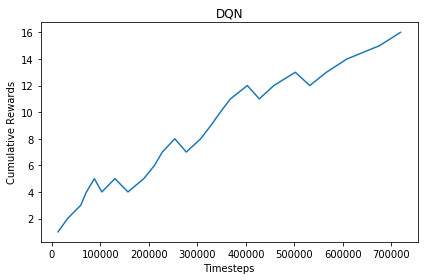

In [7]:
cumulative_plot('./models/deepq_v0/', 'DQN')

#### Test 2

<table align="left" style="margin-right: 2em">
    <tr>
        <th style="text-align: left">Policy</th>
        <td style="text-align: left">MlpPolicy</td>
    </tr>
    <tr>
        <th style="text-align: left">Gamma</th>
        <td style="text-align: left">0.99</td>
    </tr>
    <tr>
        <th style="text-align: left">Learning Rate</th>
        <td style="text-align: left">0.2</td>
    </tr>
    <tr>
        <th style="text-align: left">Exploration Fraction</th>
        <td style="text-align: left">0.7</td>
    </tr>
    <tr>
        <th style="text-align: left">Total Timesteps</th>
        <td style="text-align: left">500000</td>
    </tr>
</table>

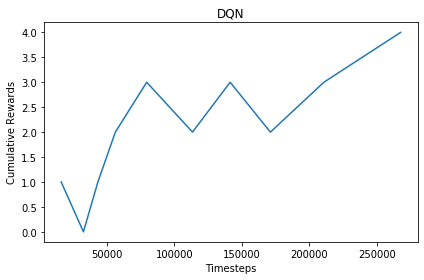

In [10]:
cumulative_plot('./models/deepq_v1/', 'DQN')

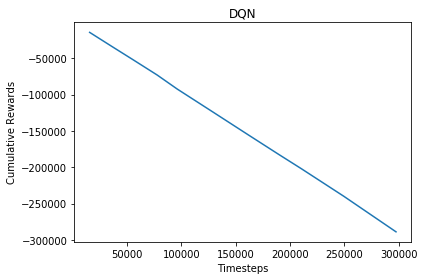

In [3]:
cumulative_plot('./models/dqn_env2_v0', 'DQN')

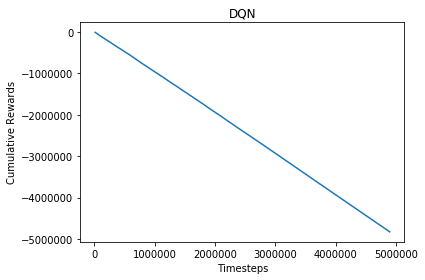

In [4]:
cumulative_plot('./models/dqn_env2_v1', 'DQN')

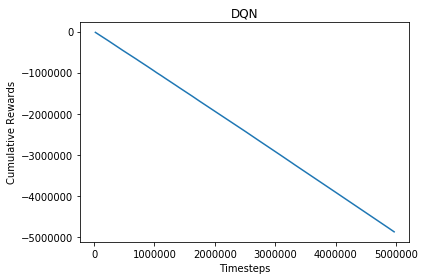

In [5]:
cumulative_plot('./models/dqn_env2_v2', 'DQN')

### Proximal Policy Optimization (PPO)

##### Test 1
 * Policy : MlpPolicy
 * Gamma : 
 * Total timesteps : 1000000
 

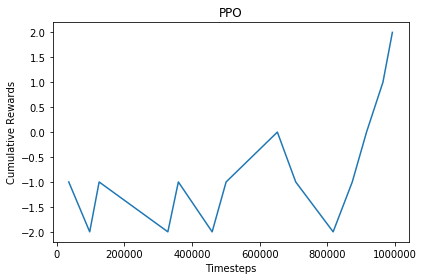

In [9]:
cumulative_plot('./models/ppo1_v0/', 'PPO')

In [9]:
cumulative_plot('./models/ppo1_v1/', 'PPO')

LoadMonitorResultsError: no monitor files of the form *monitor.csv found in ./models/ppo1_v1/

### Sample Efficient Actor-Critic with Experience Replay (ACER)

#### Test 1

<table align="left" style="margin-right: 2em">
    <tr>
        <th style="text-align: left">Policy</th>
        <td style="text-align: left">MlpPolicy</td>
    </tr>
    <tr>
        <th style="text-align: left">Gamma</th>
        <td style="text-align: left">0.99</td>
    </tr>
    <tr>
        <th style="text-align: left">Learning Rate</th>
        <td style="text-align: left">0.0007</td>
    </tr>
    <tr>
        <th style="text-align: left">Total Timesteps</th>
        <td style="text-align: left">5000000</td>
    </tr>
</table>

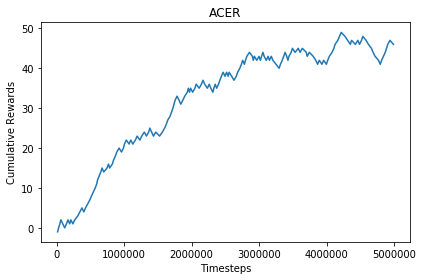

In [12]:
cumulative_plot('./models/acer_v0/', 'ACER')

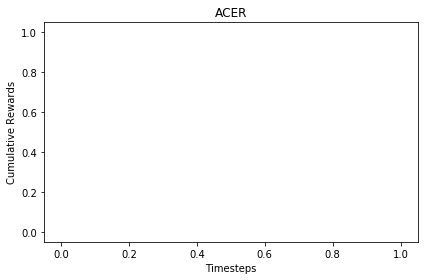

In [8]:
cumulative_plot('./models/acer_v1/', 'ACER')

## Conclusions

## References

#### Eximo Rules
 * [Eximo](https://boardgamegeek.com/boardgame/137916/eximo)

#### Packages
 * [Stable Baselines Documentation](https://stable-baselines.readthedocs.io/en/master/) 
 * [OpenAI Gym Documentation](https://gym.openai.com/docs/)
 * [NumPy Documentation](https://numpy.org/doc/1.18/)
 * [Matplotlib Documentation](https://matplotlib.org/contents.html)
 
#### OpenAI Gym Implementations
 * [Backgammon Implementation](https://github.com/dellalibera/gym-backgammon)
 * [Checkers Implementation](https://github.com/daphne12345/openai-checkers-gym)
 * [Chess Implementation](https://github.com/genyrosk/gym-chess)